<a href="https://colab.research.google.com/github/AKAB657/EDA-Theory-DA-Final/blob/main/EDA_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [31]:
print("Name: Vanaparthi Abhinay\nReg.No: 21BDS0210")

Name: Vanaparthi Abhinay
Reg.No: 21BDS0210


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.listdir('/content/drive/MyDrive/EDA_THEORY')

['bank.csv']

In [6]:
data=pd.read_csv('/content/drive/MyDrive/EDA_THEORY/bank.csv')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11157,False
11158,False
11159,False
11160,False


In [10]:
data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [11]:
#Handling Missing Values
data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [13]:
data.isnull().sum().sum()

np.int64(0)

In [14]:
data.notnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11158,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11159,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11160,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
data.count()

,0
age,11162
job,11162
marital,11162
education,11162
default,11162
balance,11162
housing,11162
loan,11162
contact,11162
day,11162


In [16]:
#Dropping Missing Values
data.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [17]:
data.dropna(how='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [18]:
pd.value_counts(data['job'])

<ipython-input-18-384f54940e96>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['job'])


,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [61]:
data.groupby(['job', 'marital', 'education']).size()

job      marital   education
admin.   divorced  primary        6
                   secondary    164
                   tertiary       9
                   unknown        3
         married   primary       31
                               ... 
unknown  married   tertiary       5
                   unknown       28
         single    secondary      6
                   tertiary       4
                   unknown        9
Length: 132, dtype: int64

In [62]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [63]:
pd.isna(data).any()

,0
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


In [22]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
non_numeric_columns = data.select_dtypes(exclude=np.number).columns.tolist()
print('numeric columns/attributes: ',numeric_columns,'\n non numeric columns/attributes:', non_numeric_columns)

numeric columns/attributes:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 
 non numeric columns/attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [23]:
#Caluclating mean, median and mode for 'balance' attribute
mean = data["balance"].mean()
median =data["balance"].median()
mode = data["balance"].mode()
print('Mean is:',mean,'\nMedian is:',median,'\n Mode is:',mode)

Mean is: 1528.5385235620856 
Median is: 550.0 
 Mode is: 0    0
Name: balance, dtype: int64


Text(0.5, 0, 'Quantity')

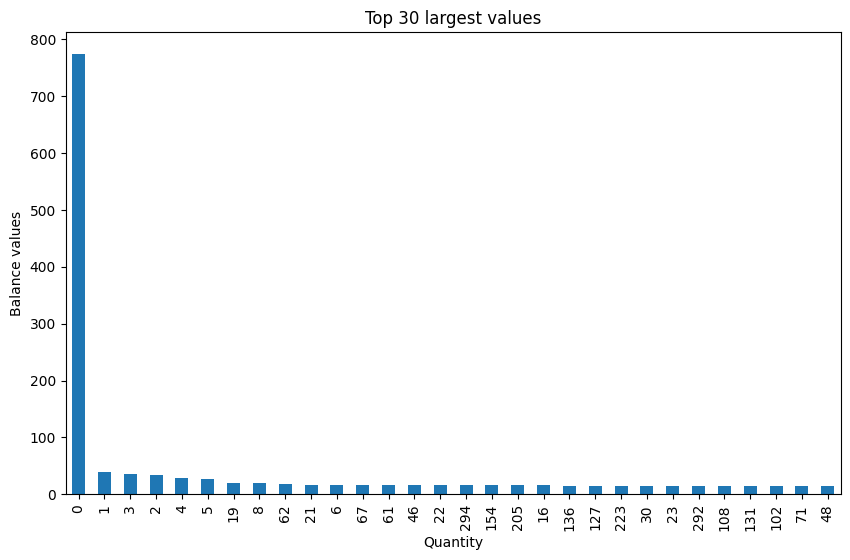

In [ ]:
#Univariate analysis
#Making a bargraph for the first 30 largest values in the balance attribute
data.balance.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Top 30 largest values")
plt.ylabel('Balance values')
plt.xlabel('Quantity')


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


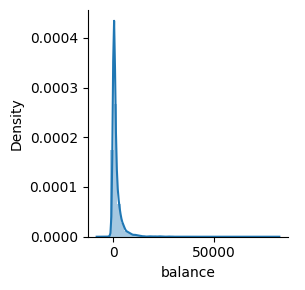

In [ ]:
#Distribution plot
sns.FacetGrid(data).map(sns.distplot,"balance").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


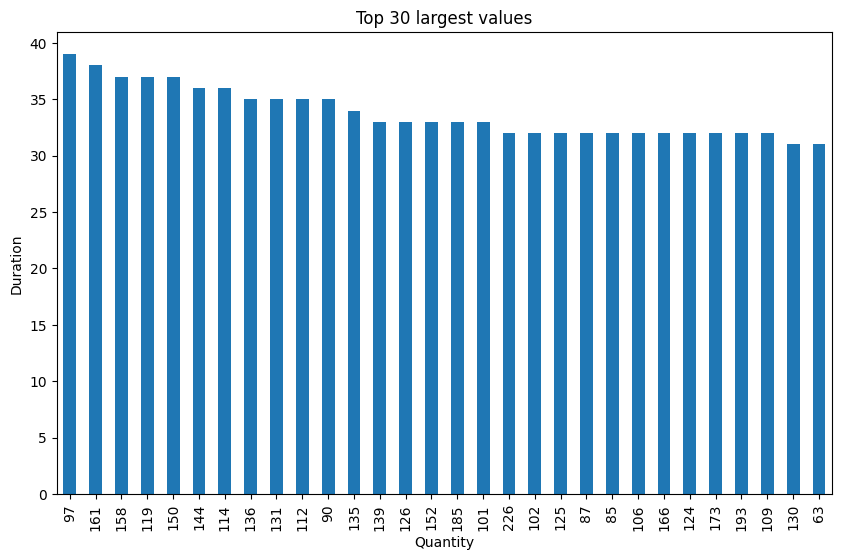

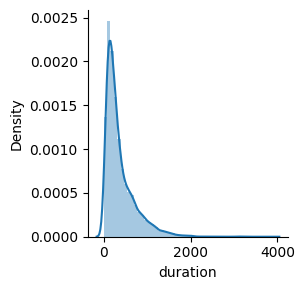

In [ ]:
#similarly for duration
data.duration.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Top 30 largest values")
plt.ylabel('Duration')
plt.xlabel('Quantity')

sns.FacetGrid(data).map(sns.distplot,"duration").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


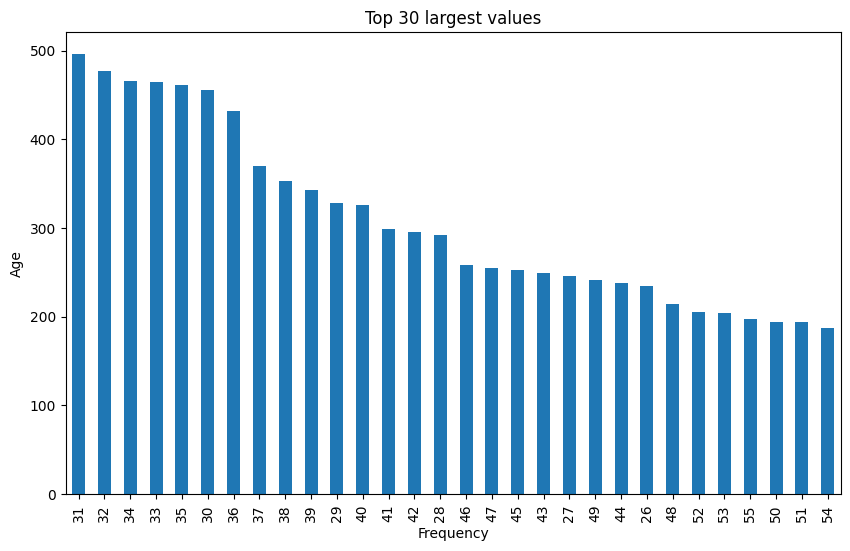

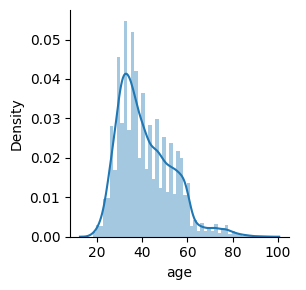

In [ ]:
#similarly for age
data.age.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Top 30 largest values")
plt.ylabel('Age')
plt.xlabel('Frequency')

sns.FacetGrid(data).map(sns.distplot,"age").add_legend()

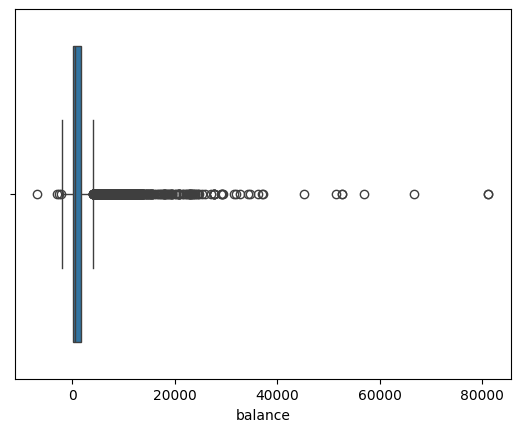

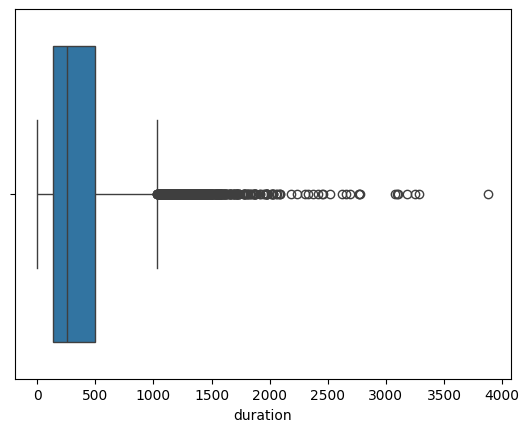

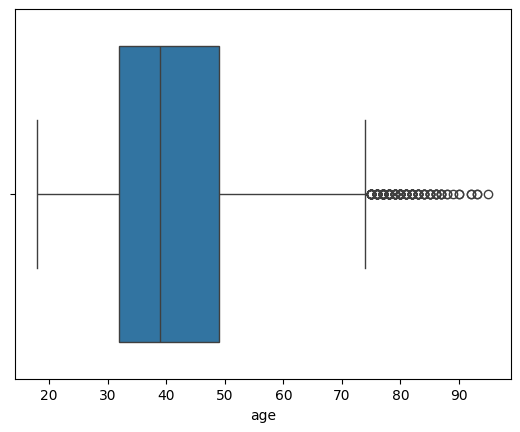

In [ ]:
#bocplot for age, duration and balance
sns.boxplot(x="balance",data=data)
plt.show()

sns.boxplot(x="duration",data=data)
plt.show()

sns.boxplot(x="age",data=data)
plt.show()


Text(0, 0.5, 'age')

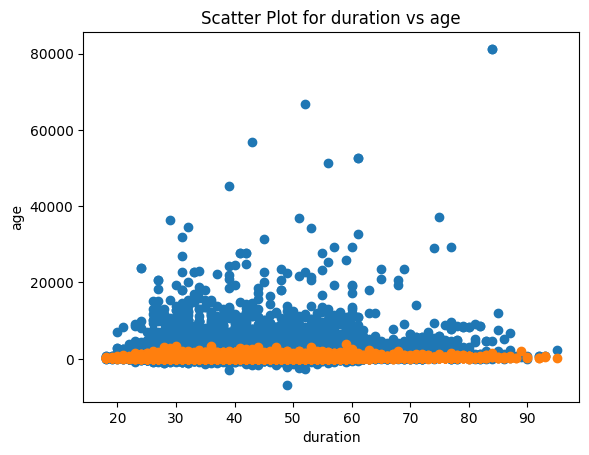

In [ ]:
#Bivariate analysis for age vs duration and age vs balance
plt.scatter(data["age"], data["balance"])
plt.title("Scatter Plot for balance vs age")
plt.xlabel("balance")
plt.ylabel("age")

plt.scatter(data["age"], data["duration"])
plt.title("Scatter Plot for duration vs age")
plt.xlabel("duration")
plt.ylabel("age")

In [ ]:
#relationship between the features age and balance [positive corelation]
np.corrcoef(data["age"], data["balance"])

array([[1.        , 0.11229989],
       [0.11229989, 1.        ]])

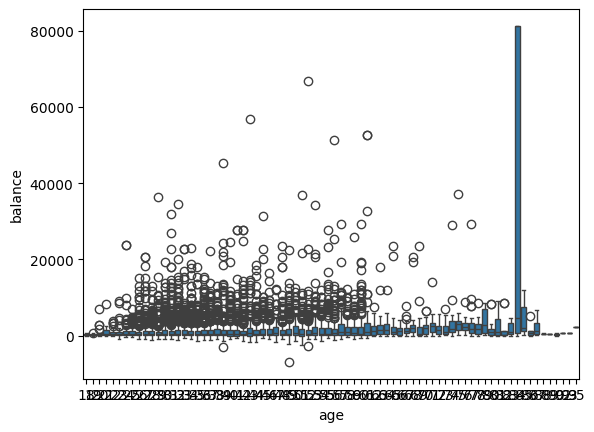

In [ ]:
#boxplot between age and their balance
sns.boxplot(x="age",y="balance",data=data)
plt.show()

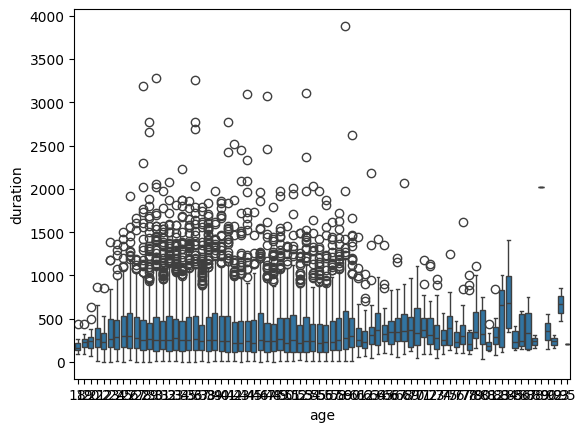

In [ ]:
#boxplot between age and duration
sns.boxplot(x="age",y="duration",data=data)
plt.show()

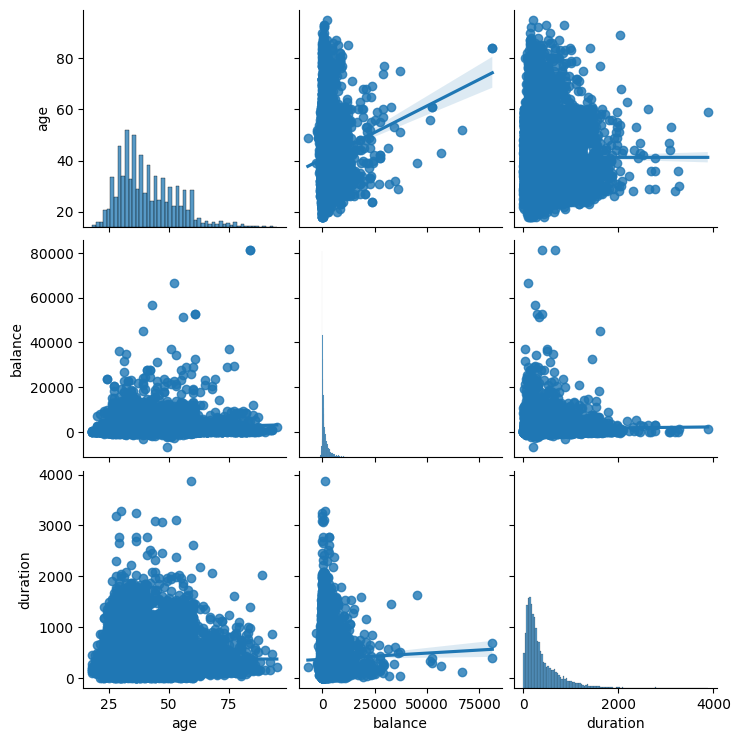

In [ ]:
#Multivariate Analysis
# pair plot with plot type regression
sns.pairplot(data,vars = ['age', 'balance','duration'], kind="reg")
plt.show()

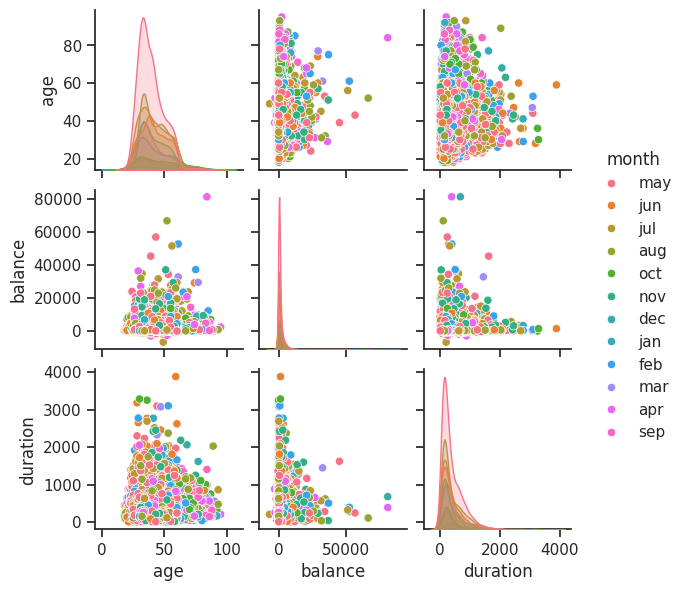

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,height=2,vars = ['age', 'balance','duration'], hue="month")
plt.show()

In [ ]:
#correlation coefficient for age and balance
from scipy import stats

corr = stats.pearsonr(data["age"], data["balance"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.171392127854011e-32
cor:		 0.11229988859873163


In [ ]:
#correlation coefficient for age and duration
from scipy import stats

corr1 = stats.pearsonr(data["age"], data["duration"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.9840515280223214
cor:		 0.00018922807371432246


In [ ]:
#correlation among the entire numerical records the columns using pearson method
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<Axes: >

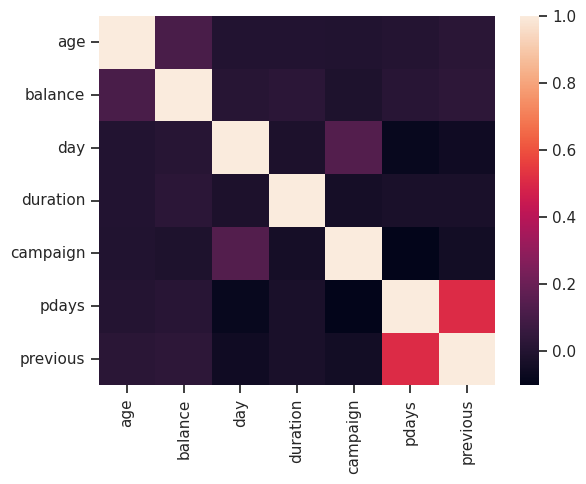

In [ ]:
#Visualize this correlation analysis using a heatmap.
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

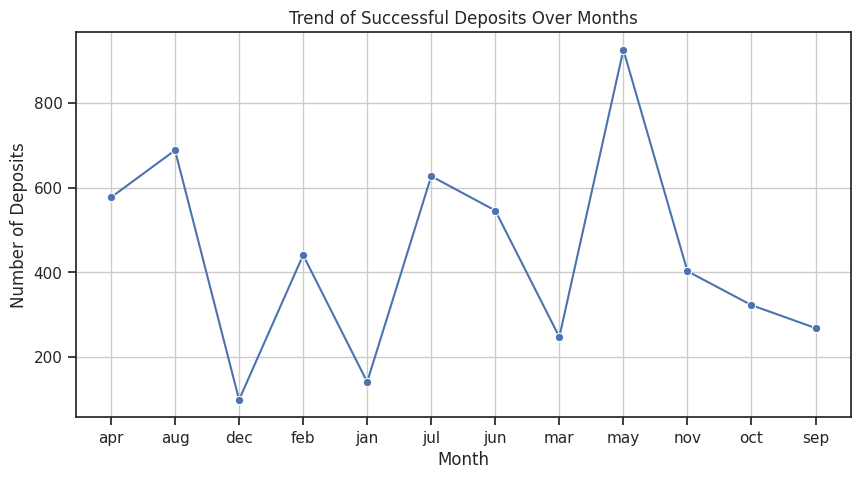

In [ ]:
#Trend of Successful Deposits Over Time
#Trend of Successful Deposits Over Time
plt.figure(figsize=(10, 5))
deposit_counts = data[data['deposit'] == 'yes'].groupby('month')['deposit'].count()
sns.lineplot(x=deposit_counts.index, y=deposit_counts.values, marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Number of Deposits")
plt.title("Trend of Successful Deposits Over Months")
plt.grid()
plt.show()

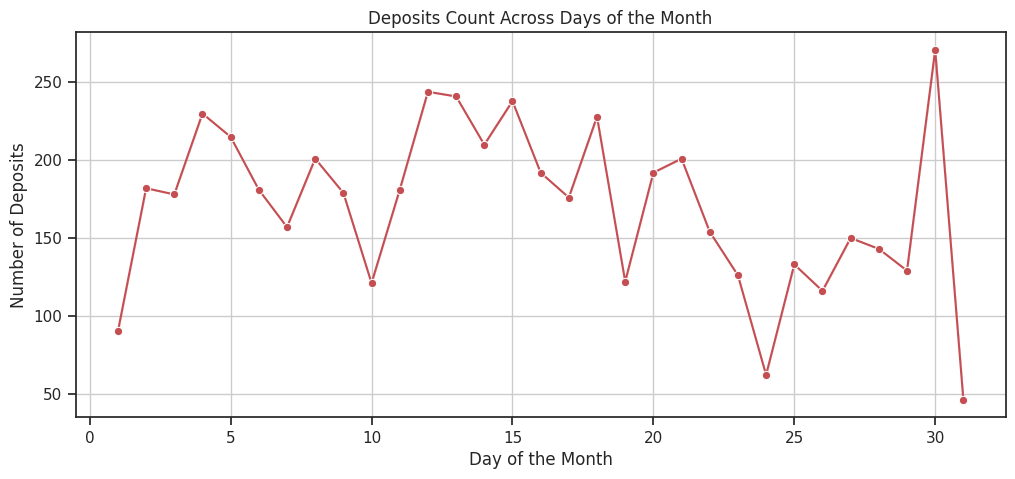

In [ ]:
#2. Seasonal Analysis - Deposits by Day
plt.figure(figsize=(12, 5))
sns.lineplot(data=data[data['deposit'] == 'yes'], x="day", y=data[data['deposit'] == 'yes'].groupby("day")["day"].transform("count"), marker='o', color='r')
plt.xlabel("Day of the Month")
plt.ylabel("Number of Deposits")
plt.title("Deposits Count Across Days of the Month")
plt.grid()
plt.show()

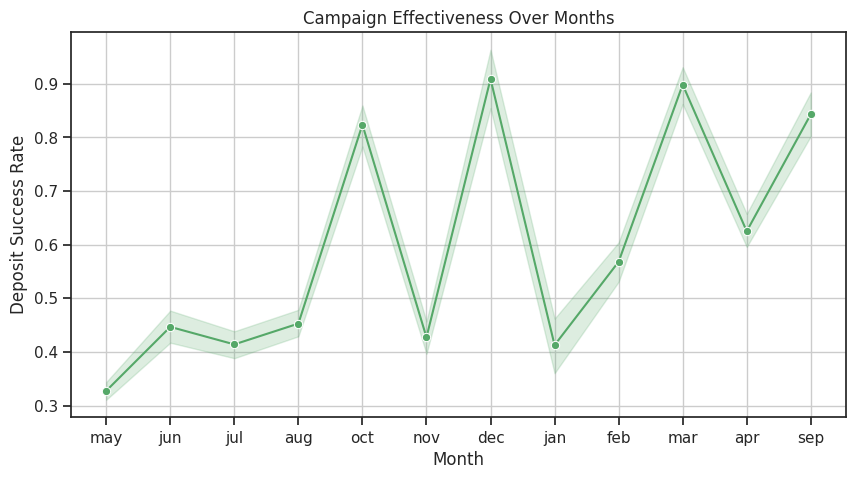

In [ ]:
#Campaign Effectiveness Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="month", y=(data['deposit'] == 'yes').astype(int), estimator='mean', marker='o', color='g')
plt.xlabel("Month")
plt.ylabel("Deposit Success Rate")
plt.title("Campaign Effectiveness Over Months")
plt.grid()
plt.show()

In [25]:
                                                #TIME SERIES ANALYSIS
# Convert 'day' and 'month' to a proper datetime object
data['date'] = pd.to_datetime(data['day'].astype(str) + '-' + data['month'] + '-2020', format='%d-%b-%Y')

# Sort by date
data = data.sort_values(by='date')

# Convert 'deposit' to binary (yes = 1, no = 0)
data['deposit_binary'] = data['deposit'].map({'yes': 1, 'no': 0})


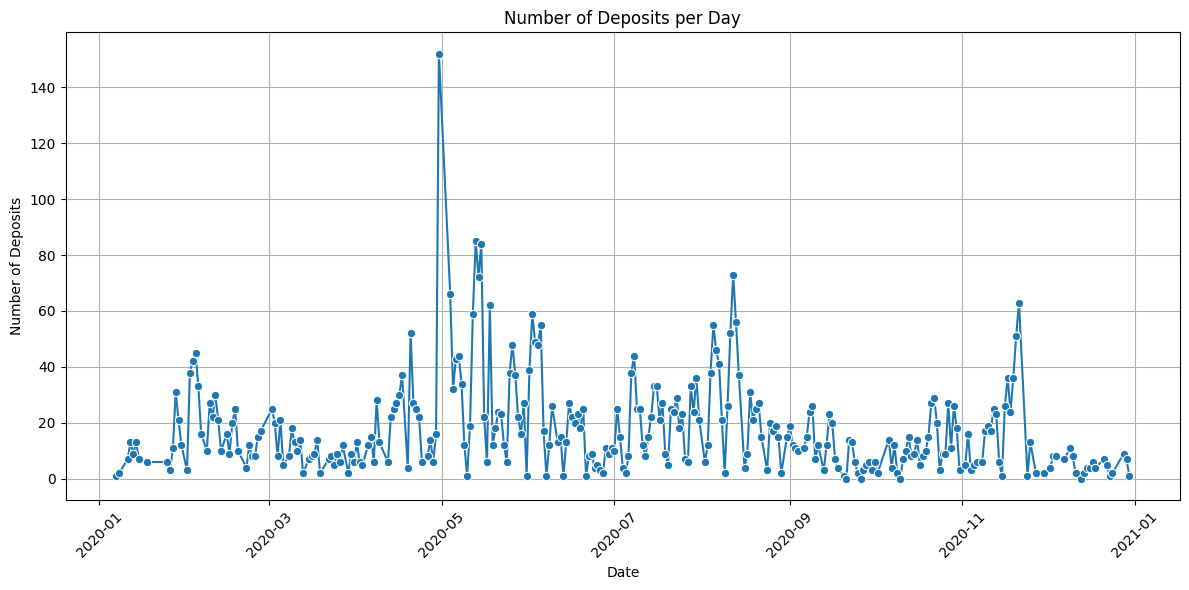

In [26]:
#Daily Deposit Trend
# Group by date to get daily deposit counts
daily_deposits = data.groupby('date')['deposit_binary'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_deposits, x='date', y='deposit_binary', marker='o')
plt.title('Number of Deposits per Day')
plt.xlabel('Date')
plt.ylabel('Number of Deposits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-27-d3319d25f438>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deposits = data.groupby('month_ordered')['deposit_binary'].sum().reset_index()
<ipython-input-27-d3319d25f438>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_deposits, x='month_ordered', y='deposit_binary', palette='Blues_d')


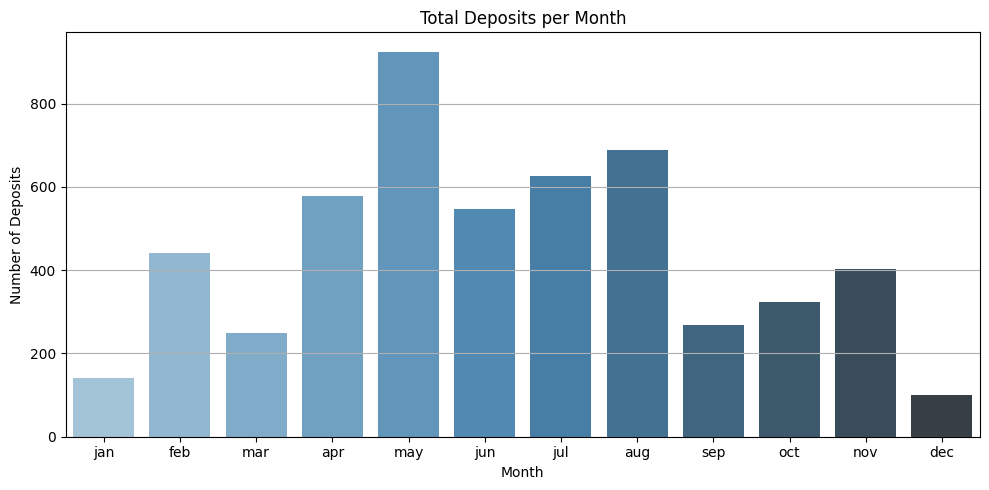

In [27]:
#Monthly Deposit Totals
# Order the month names properly
data['month_ordered'] = pd.Categorical(data['month'],
    categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ordered=True)

# Group by month
monthly_deposits = data.groupby('month_ordered')['deposit_binary'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_deposits, x='month_ordered', y='deposit_binary', palette='Blues_d')
plt.title('Total Deposits per Month')
plt.xlabel('Month')
plt.ylabel('Number of Deposits')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


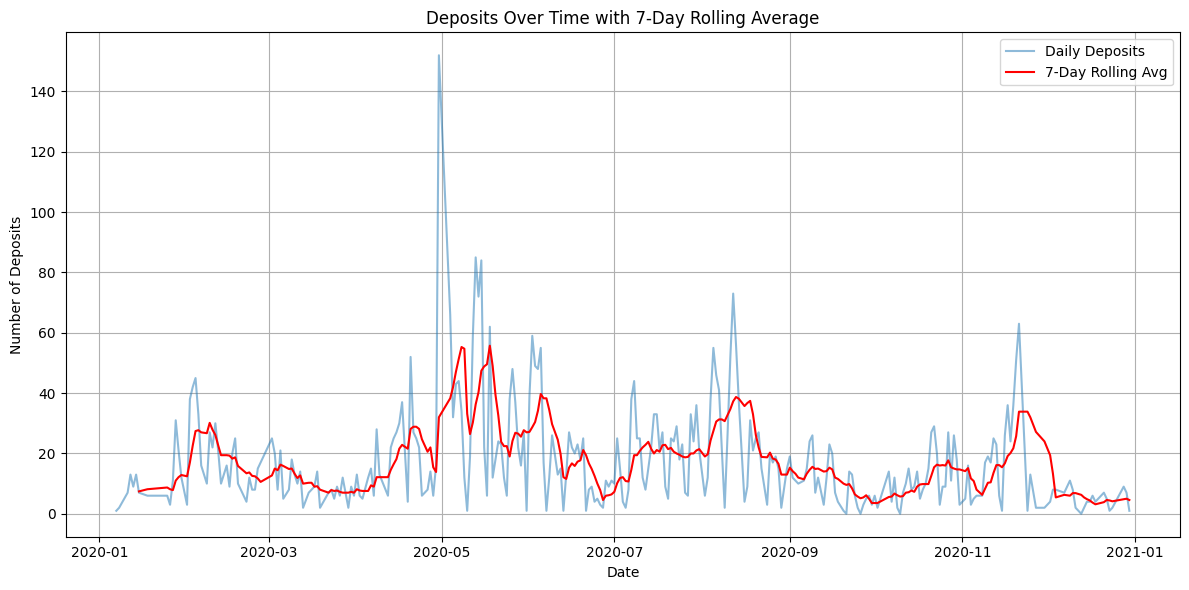

In [28]:
#7-Day Rolling Average
# Compute rolling average
daily_deposits['rolling_avg_7'] = daily_deposits['deposit_binary'].rolling(window=7).mean()

# Plot with rolling average
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_deposits, x='date', y='deposit_binary', label='Daily Deposits', alpha=0.5)
sns.lineplot(data=daily_deposits, x='date', y='rolling_avg_7', label='7-Day Rolling Avg', color='red')
plt.title('Deposits Over Time with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Deposits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-29-d3d6fe5be44d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y='duration', data=data, palette='Set2')


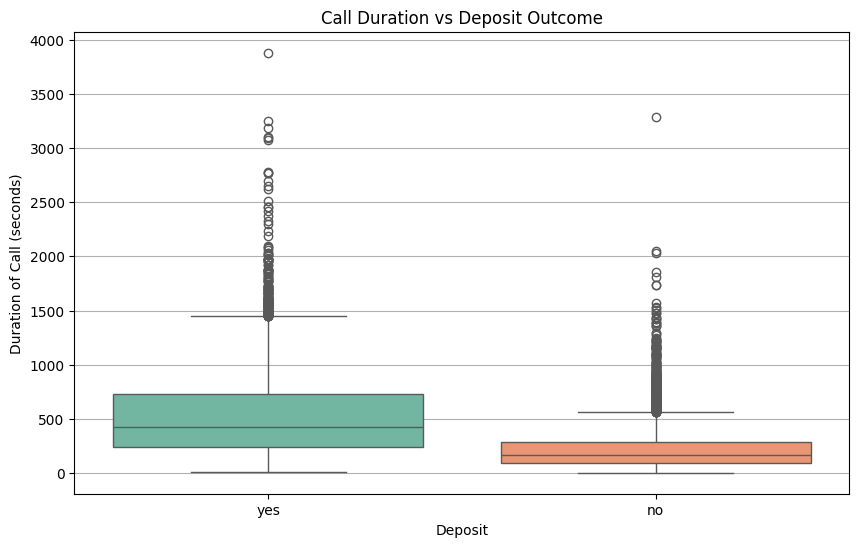

In [29]:
#Boxplot For Duration of Call vs Deposit Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='duration', data=data, palette='Set2')
plt.title('Call Duration vs Deposit Outcome')
plt.xlabel('Deposit')
plt.ylabel('Duration of Call (seconds)')
plt.grid(True, axis='y')
plt.show()

<ipython-input-30-13e818c7765f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month_ordered', y='balance', data=data, palette='coolwarm')


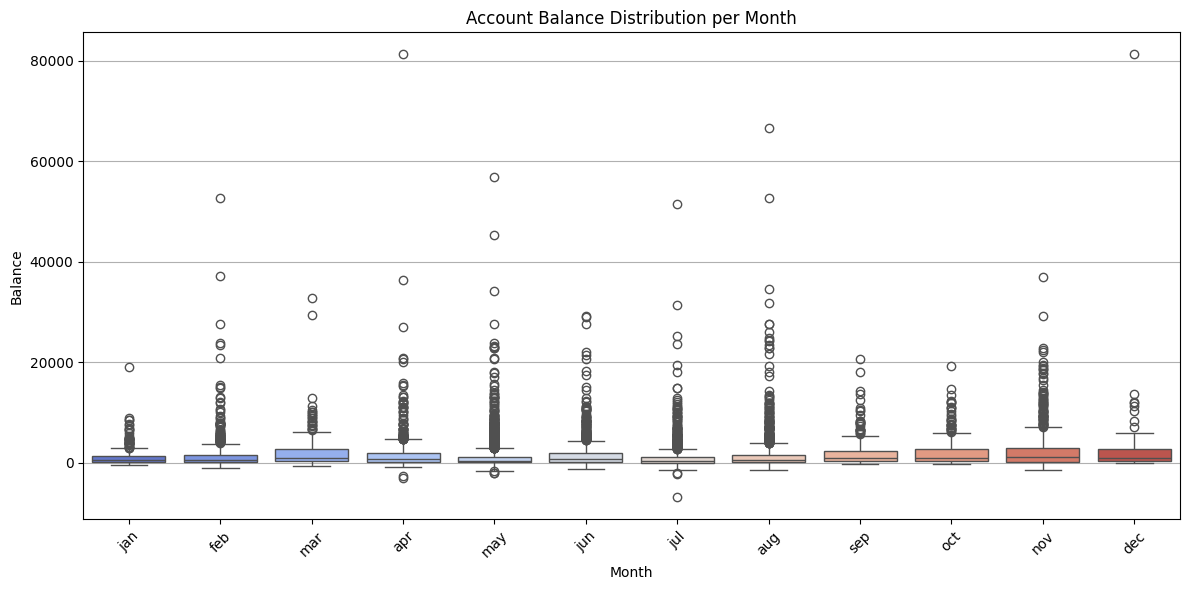

In [30]:
#Boxplot For Account Balance vs Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_ordered', y='balance', data=data, palette='coolwarm')
plt.title('Account Balance Distribution per Month')
plt.xlabel('Month')
plt.ylabel('Balance')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

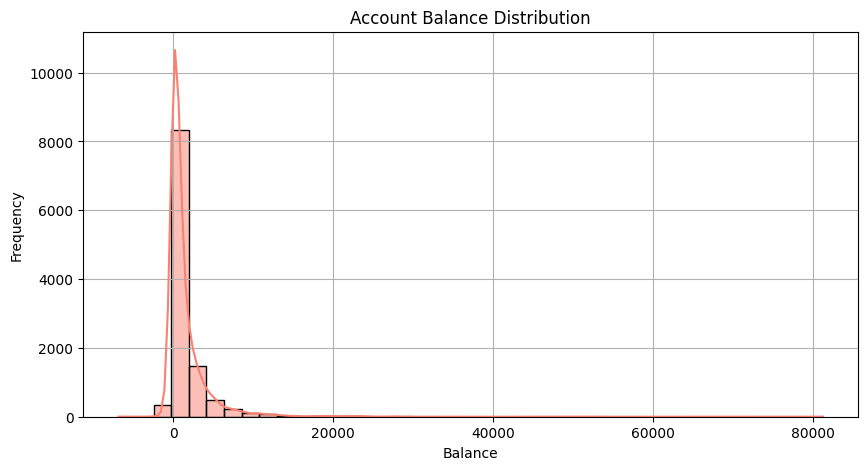

In [32]:
#1D analysis for Account Balance
plt.figure(figsize=(10, 5))
sns.histplot(data['balance'], kde=True, bins=40, color='salmon')
plt.title('Account Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
# Select a numerical column
num_col = "balance"

# Summary statistics
mean_val = data[num_col].mean()
median_val = data[num_col].median()
mode_val = data[num_col].mode().values[0]
skewness_val = data[num_col].skew()
kurtosis_val = data[num_col].kurt()


In [38]:
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Summary Statistics:
Mean: 1528.54
Median: 550.00
Mode: 0.00
Skewness: 8.22
Kurtosis: 126.86


<ipython-input-39-f937e2c08e6a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[num_col], kde=False, rug=True, color='coral')


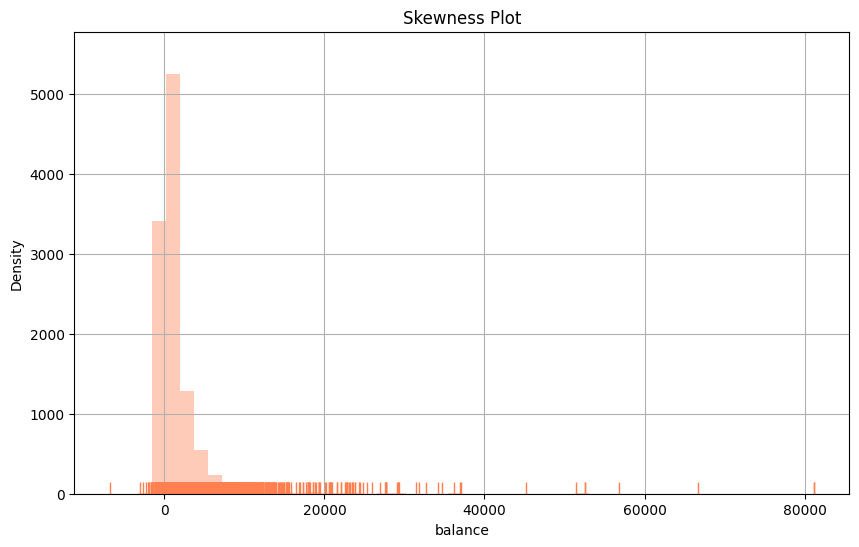

In [39]:
# Skewness plot
plt.figure(figsize=(10, 6))
sns.distplot(data[num_col], kde=False, rug=True, color='coral')
plt.title("Skewness Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.grid(True)
plt.show()

<ipython-input-40-12e5808aa175>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[num_col], shade=True, color='skyblue')


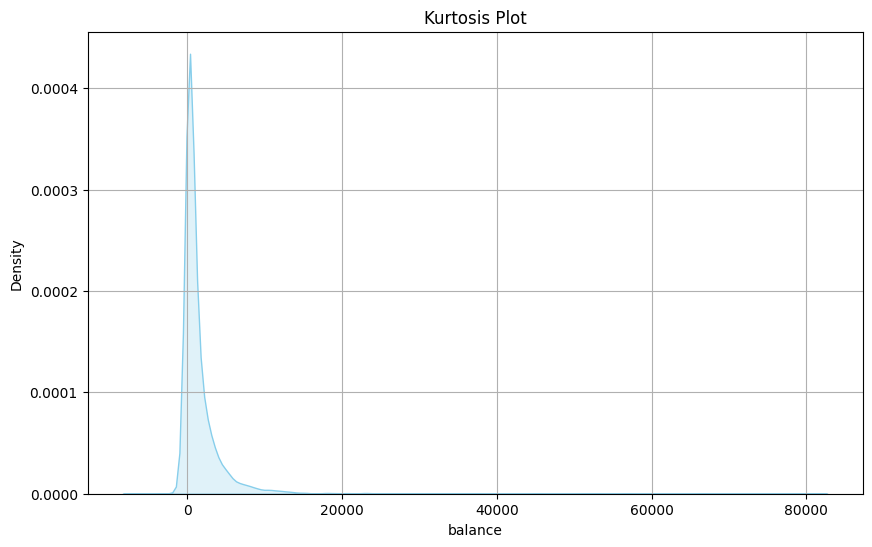

In [40]:
# Kurtosis plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data[num_col], shade=True, color='skyblue')
plt.title("Kurtosis Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.grid(True)
plt.show()

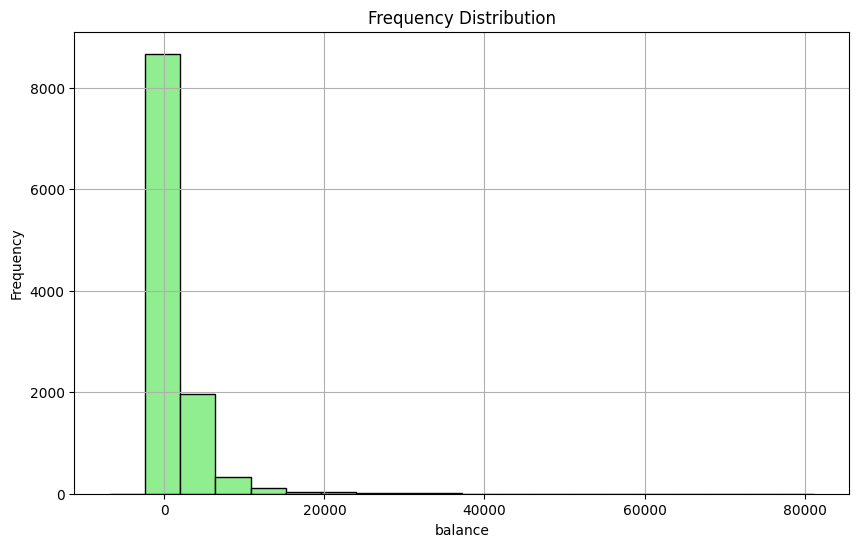

In [41]:
# Histogram (Frequency Distribution)
plt.figure(figsize=(10, 6))
data[num_col].plot.hist(bins=20, edgecolor="black", color='lightgreen')
plt.title("Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

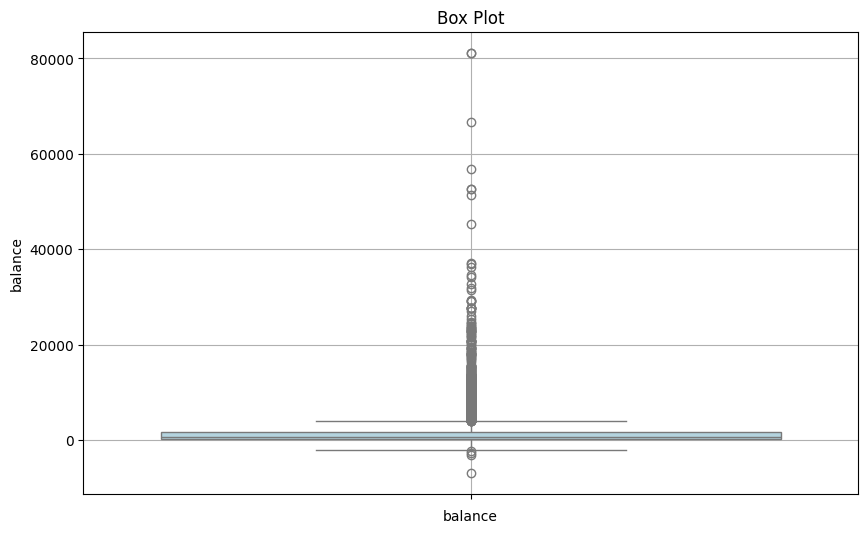

In [42]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data[num_col], color='lightblue')
plt.title("Box Plot")
plt.xlabel(num_col)
plt.grid(True)
plt.show()

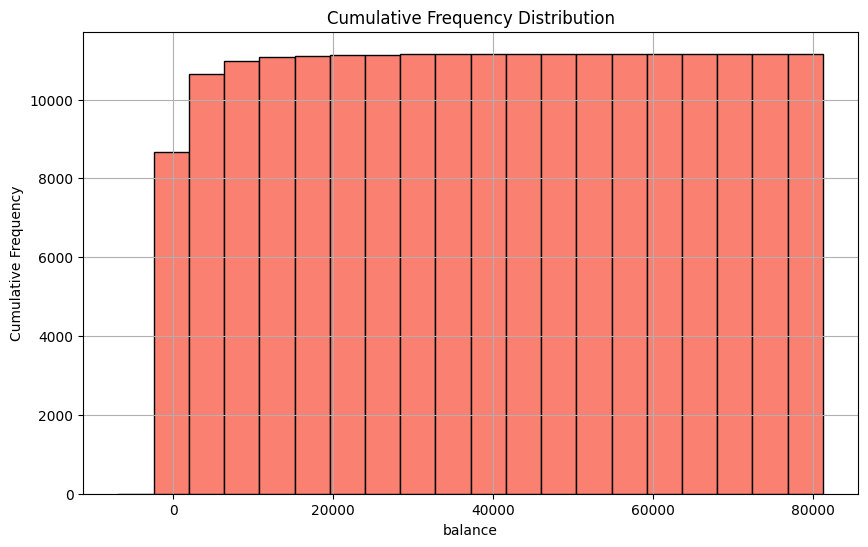

In [44]:
# Cumulative Frequency Plot
plt.figure(figsize=(10, 6))
data[num_col].plot(kind="hist", cumulative=True, bins=20, edgecolor="black", color='salmon')
plt.title("Cumulative Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Cumulative Frequency")
plt.grid(True)
plt.show()

In [45]:
pip install python-ternary

/usr/local/lib/python3.11/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


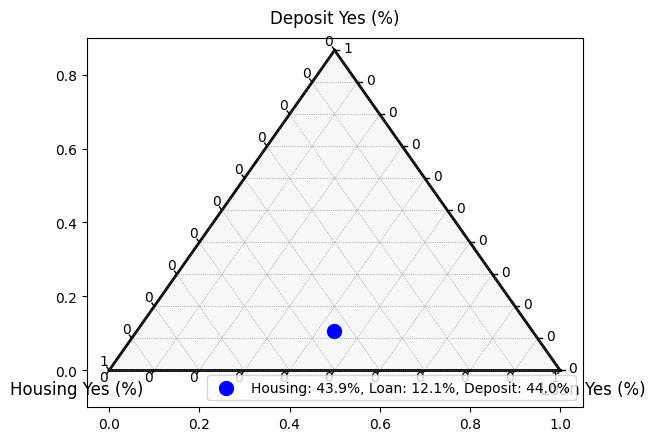

In [64]:
import ternary

# Calculate percentage of 'yes' in each binary column
housing_yes = (data['housing'] == 'yes').sum() / len(data) * 100
loan_yes = (data['loan'] == 'yes').sum() / len(data) * 100
deposit_yes = (data['deposit'] == 'yes').sum() / len(data) * 100

# Normalize to sum to 100%
total = housing_yes + loan_yes + deposit_yes
housing_norm = housing_yes / total
loan_norm = loan_yes / total
deposit_norm = deposit_yes / total

# Prepare data
ternary_data = [(housing_norm, loan_norm, deposit_norm, 'o')]

# Create ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=0.1)

# Plot point
for h, l, d, symbol in ternary_data:
    tax.scatter([(h, l, d)], marker=symbol, color='blue', s=100, label=f"Housing: {h*100:.1f}%, Loan: {l*100:.1f}%, Deposit: {d*100:.1f}%")

# Label corners
tax.left_corner_label("Housing Yes (%)", fontsize=12)
tax.right_corner_label("Loan Yes (%)", fontsize=12)
tax.top_corner_label("Deposit Yes (%)", fontsize=12)

# Style
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.legend()
tax.show()


In [66]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
# Elbow Method for KMeans
# Select two numerical features for clustering
X = data[['balance', 'duration']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

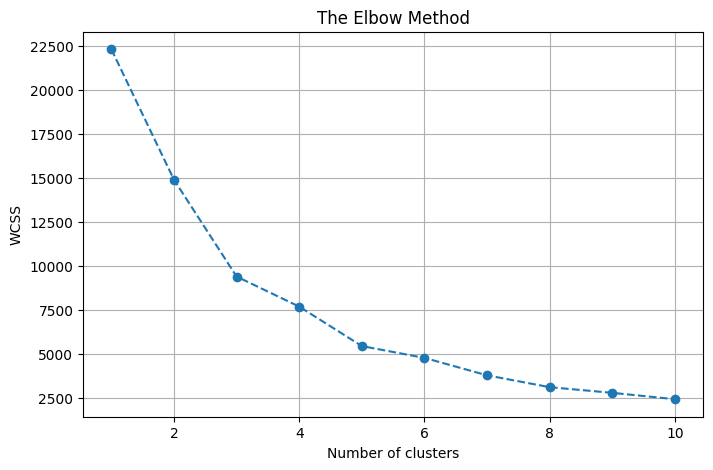

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [69]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

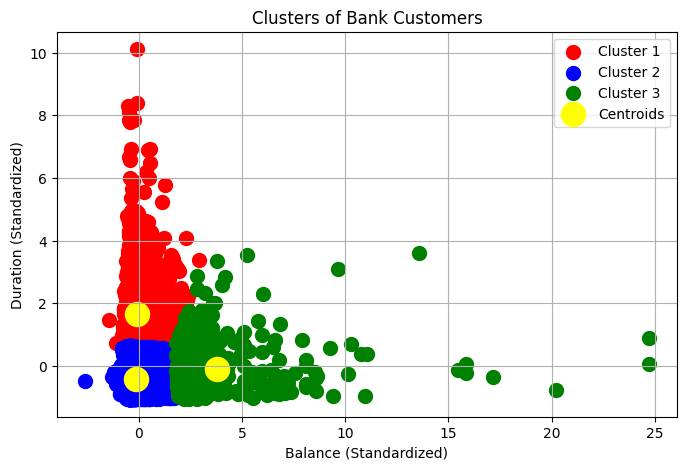

In [70]:
# Visualize KMeans Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Bank Customers')
plt.xlabel('Balance (Standardized)')
plt.ylabel('Duration (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

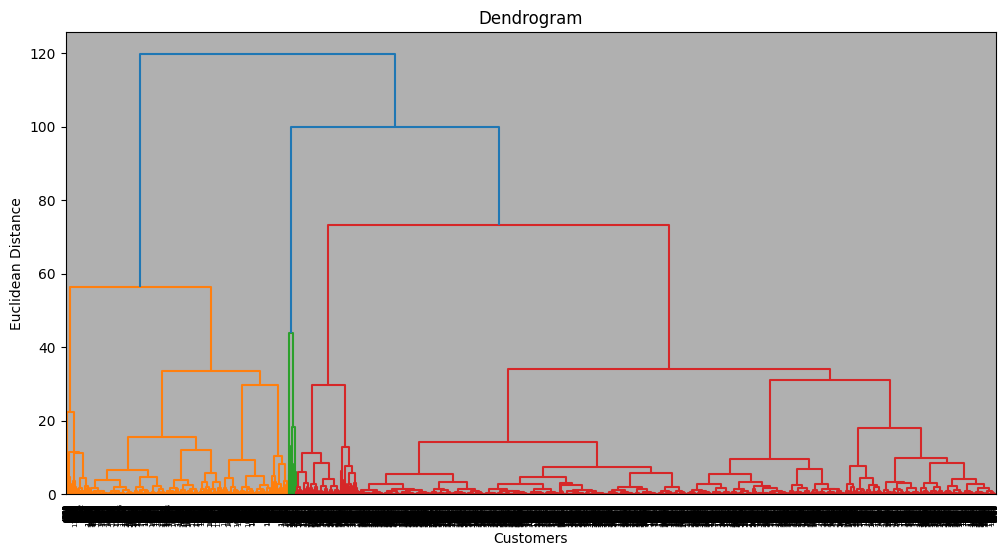

In [71]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.grid(True)
plt.show()

In [32]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data_encoded = pd.get_dummies(data, drop_first=True)

In [33]:
# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

In [34]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


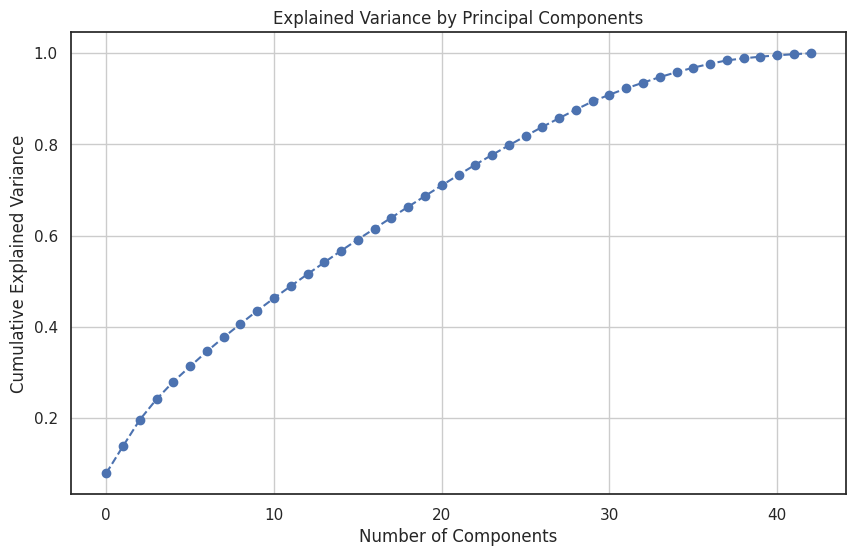

In [35]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


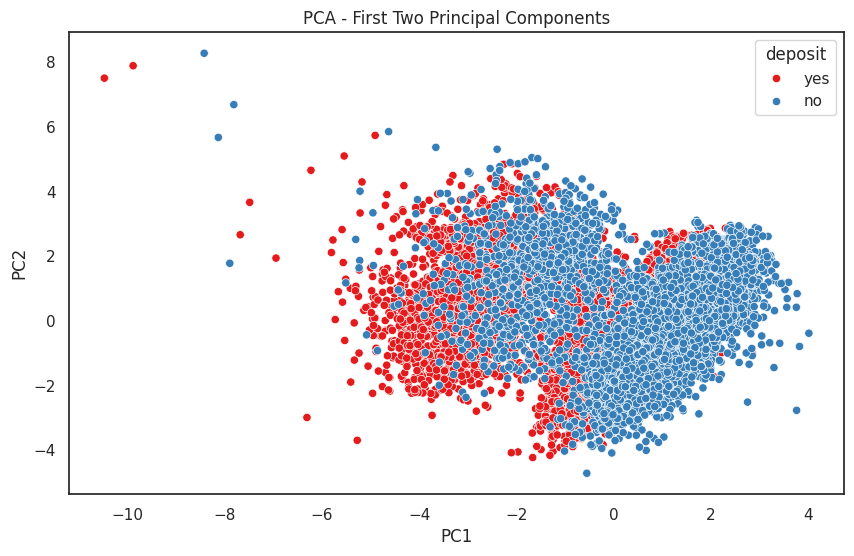

In [36]:
# DataFrame for visualization
pca_df = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])

# Add target column
pca_df['deposit'] = data['deposit']

#PCA result
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='deposit', palette='Set1')
plt.title('PCA - First Two Principal Components')
plt.show()


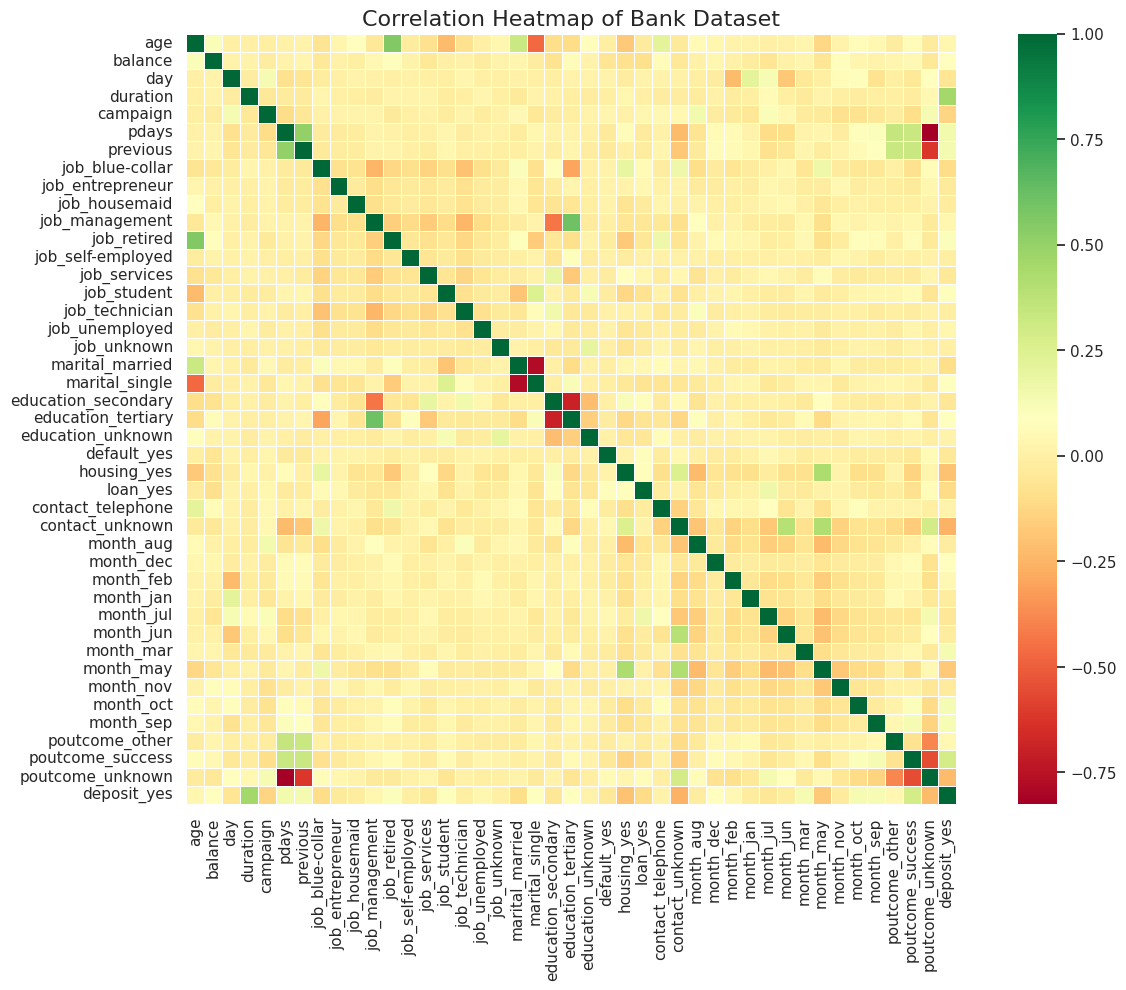

In [19]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Set plot size and style
plt.figure(figsize=(16, 10))
sns.set(style="white")

# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', square=True, linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap of Bank Dataset", fontsize=16)
plt.show()

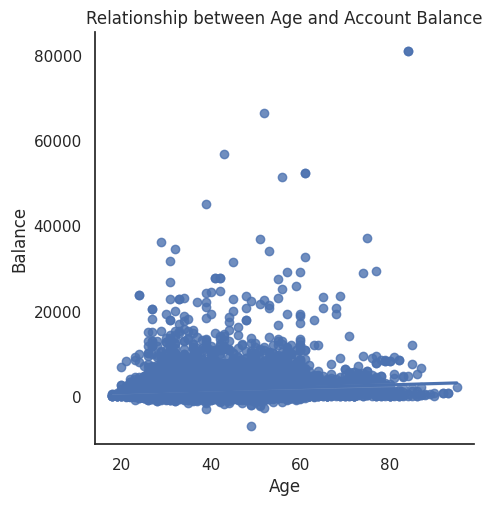

In [20]:
# Create the lmplot
sns.lmplot(x='age', y='balance', data=data)

# Customize plot
plt.title('Relationship between Age and Account Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


In [21]:
#Lineaar Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prepare the data
X = data[['age']]
y = data[['balance']]

In [22]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
regressor.score(X_test, y_test)

0.013097708741996672

In [26]:
# Model Evaluation
y_pred = regressor.predict(X_test)

# Create a comparison DataFrame
evaluate = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})

In [27]:
# Show first 10 comparisons
print(evaluate.head(10))

   Actual    Predicted
0     744  2253.951684
1    1627  1439.089228
2    4963  1348.548955
3    8229  1710.710047
4    1473  1348.548955
5     119  1197.648500
6    3434  1710.710047
7     771  1982.330866
8    3443  1348.548955
9   10086  1076.928136


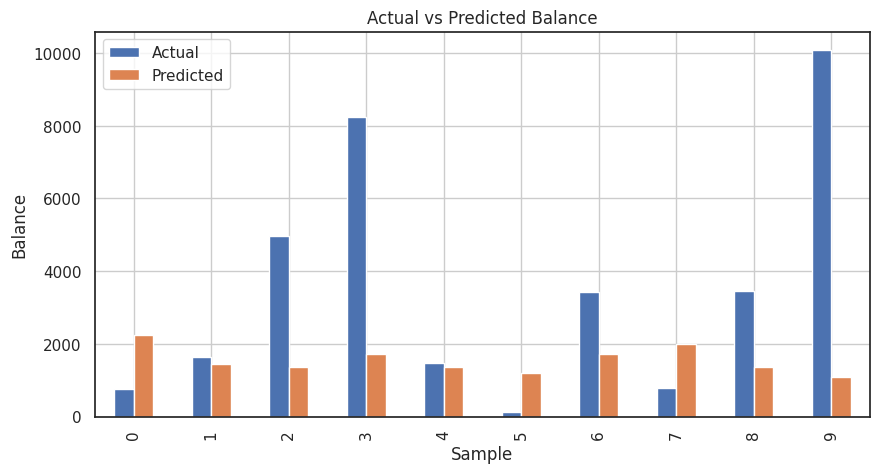

In [28]:
# Plot Actual vs Predicted
evaluate.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Actual vs Predicted Balance')
plt.xlabel('Sample')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

In [29]:
# Print metrics
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")

R2 Score: 0.0131
Mean Absolute Error (MAE): 1643.07
Mean Squared Error (MSE): 10406110.95


In [37]:
print("Link for ggithub repository:\nlink:https://github.com/AKAB657/EDA-Theory-DA-Final/blob/main/EDA_theory.ipynb")

Link for ggithub repository:
link:https://github.com/AKAB657/EDA-Theory-DA-Final/blob/main/EDA_theory.ipynb
